## Preambule

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

## Read data

In [2]:
xr_dataread = xr.open_dataset("K:/ECEMF/T5.2/xr_dataread.nc")
xr_nld_raw = xr.open_dataset("K:/ECEMF/T5.2/Allocations/xr_alloc_NLD.nc")

In [3]:
basic_settings = {'Temperature': 1.5, 'Risk': 0.5, 'NegEmis': 0.5, 'NonCO2red': 0.5, 'Scenario':'SSP2', 'Convergence_year':2050}
rules = ['GF', 'PCC', 'PC', 'AP', 'ECPC', 'GDR']
#rulecolors = np.array([(121, 125, 28), 'forestgreen', 'goldenrod', 'mediumvioletred', 'tomato', 'steelblue'])/256
rulecolors = np.array([(90, 51, 36), (141, 145, 31), (0, 156, 223), (157, 0, 100), (230, 173, 31), (61, 29, 92), ])/256
rulenames = ['Grandfathering', 'Per capita convergence', 'Per capita', 'Ability to pay', "Equal cumulative per capita", 'Greenhouse Development Rights']

In [4]:
emis_1990 = xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)

In [162]:
def vert(ax, valx, valy, ruleno):
    ax.plot([valx, valx], [-1e3, valy], '--', c=rulecolors[ruleno], lw=2, zorder=1e99)
    ax.plot([valx, valx], [-1e3, valy], 'o', c=rulecolors[ruleno], ms=10, zorder=1e99)

## Plot

In [163]:
dt = 0.5
xr_nld = xr_nld_raw#.sel(Risk=0.5, NegEmis=0.5, NonCO2red=0.5)#.reindex(Temperature=np.arange(1.5, 2.405, 0.01).round(2))
#xr_nld = xr_nld.interpolate_na(dim='Temperature')

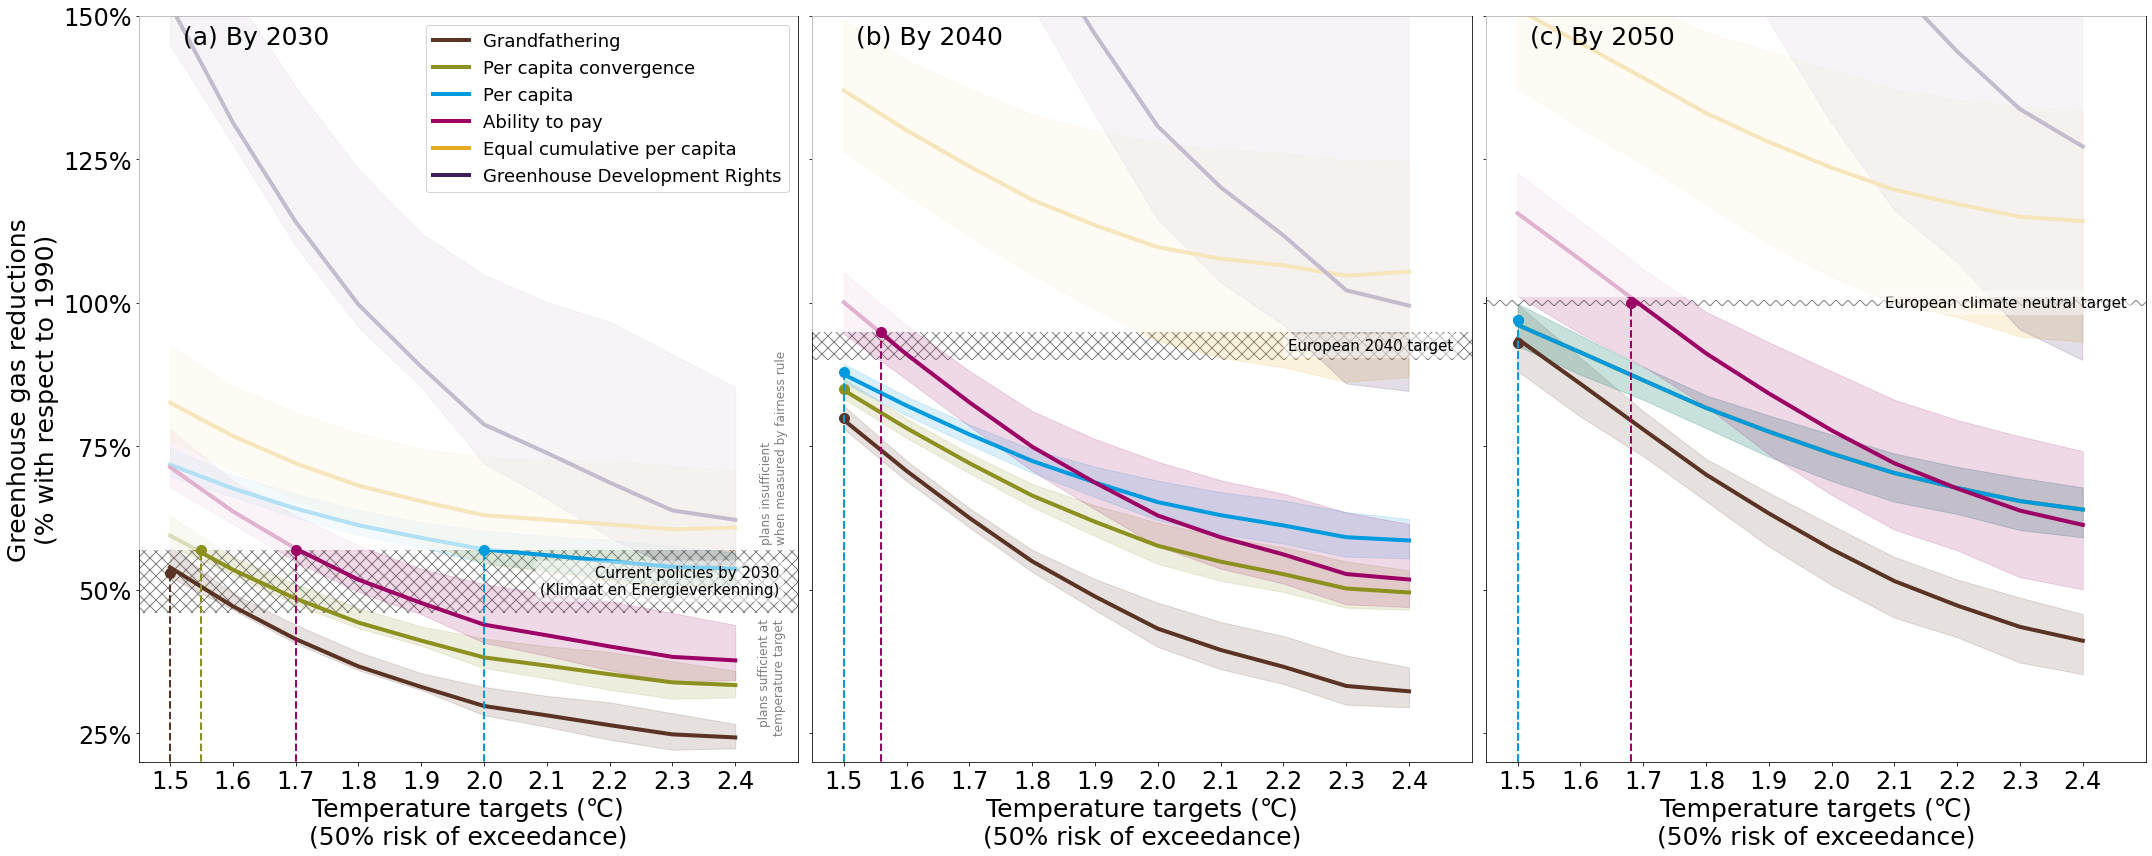

In [171]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 12), facecolor='w', sharey=True)
for ax_i, ax in enumerate([ax1, ax2, ax3]):
    year = [2030, 2040, 2050][ax_i]
    ax.set_xlim([1.45, 2.5])
    ax.set_xticks(np.arange(1.5, 2.41, 0.1))
    #ax.set_xticklabels([str(i.round(1))+"℃" for i in np.arange(1.5, 2.31, 0.1)])

    ax.set_ylim([20, 150])
    ax.set_yticks(np.arange(25, 151, 25))
    ax.set_yticklabels([str(i.round(1))+"%" for i in np.arange(25, 151, 25)])

    for rule_i, rule in enumerate(rules):
        dat = xr_nld.sel(Risk=0.5, NegEmis=0.5, NonCO2red=0.5, Timing='Immediate').sel({'Scenario':'SSP2', 'Convergence_year':2050})[rule].sel(Time=year)
        reds = -(dat - emis_1990)/emis_1990*100
        wh = np.where(reds >= [57, 95, 100][ax_i])[0]
        ax.plot(dat.Temperature, reds, lw=4, c=rulecolors[rule_i], label=rulenames[rule_i])
        y2 = -(xr_nld.sel({'Risk': 0.5, 'Convergence_year':2050, "Timing": 'Immediate'}).sel(Time=year).max(dim=['Scenario', 'NonCO2red', 'NegEmis'], skipna=False)[rule] - emis_1990)/emis_1990*100
        y1 = -(xr_nld.sel({'Risk': 0.5, 'Convergence_year':2050, "Timing": 'Immediate'}).sel(Time=year).min(dim=['Scenario', 'NonCO2red', 'NegEmis'], skipna=False)[rule] - emis_1990)/emis_1990*100
        ax.fill_between(dat.Temperature, y1, y2, where=y1>=y2, color=rulecolors[rule_i], alpha=0.15)

    #ax.plot([-1e3, 1e5], [100, 100], '--', c='silver', zorder=-1e9)

    #plt.legend(fontsize=15)
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    ax.set_xlabel('Temperature targets (℃)\n(50% risk of exceedance)', fontsize=25)
    #ax.grid()
    ax.text(1.52, 145, ['(a) By 2030', '(b) By 2040', '(c) By 2050'][ax_i], fontsize=25, zorder=1e9+1)
    x = np.linspace(-1e3, 2040, 10)
    y2 = np.array([[57, 95, 101][ax_i]]*len(x))
    y1 = np.array([1e3]*len(x))
    ax.fill_between(x, y1, y2, where=y1>=y2, alpha=0.7, zorder=1e9, color="w", edgecolor='w', lw=0)

vert(ax1, 1.5, 53, 0)
vert(ax1, 1.55, 57, 1)
vert(ax1, 1.7, 57, 3)
vert(ax1, 2.0, 57, 2)

vert(ax2, 1.5, 80, 0)
vert(ax2, 1.5, 85, 1)
vert(ax2, 1.5, 88, 2)
vert(ax2, 1.56, 95, 3)

vert(ax3, 1.5, 93, 0)
vert(ax3, 1.5, 97, 1)
vert(ax3, 1.5, 97, 2)
vert(ax3, 1.68, 100, 3)
ax1.legend(loc="upper right", fontsize=18).set_zorder(1e9+3)

ax1.text(2.44, 58, 'plans insufficient\nwhen measured by fairness rule', rotation=90, fontsize=12, va='bottom', ha='left', color='grey', zorder=1e9+3)
ax1.text(2.48, 45, 'plans sufficient at\ntemperature target', rotation=90, fontsize=12, va='top', ha='right', color='grey')

ax1.text(2.47, np.mean([46, 57]), 'Current policies by 2030\n(Klimaat en Energieverkenning)', bbox=dict(boxstyle="round", fc='white', ec=None, lw=0, alpha=0.5), fontsize=15, ha='right', va='center')
ax2.text(2.47, np.mean([90, 95]), 'European 2040 target', bbox=dict(boxstyle="round", fc='white', ec=None, lw=0, alpha=0.5), fontsize=15, ha='right', va='center')
ax3.text(2.47, 100, 'European climate neutral target', bbox=dict(boxstyle="round", fc='white', ec=None, lw=0, alpha=0.5), fontsize=15, ha='right', va='center')

# Policy stuff
x = np.linspace(-1e3, 2040, 10)
y2 = np.array([46]*len(x))
y1 = np.array([57]*len(x))
ax1.fill_between(x, y1, y2, where=y1>=y2, alpha=0.5, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)
x = np.linspace(-1e3, 2040, 10)
y2 = np.array([90]*len(x))
y1 = np.array([95]*len(x))
ax2.fill_between(x, y1, y2, where=y1>=y2, alpha=0.5, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)
x = np.linspace(-1e3, 2040, 10)
y2 = np.array([99.5]*len(x))
y1 = np.array([100.5]*len(x))
ax3.fill_between(x, y1, y2, where=y1>=y2, alpha=0.5, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)
ax1.set_ylabel('Greenhouse gas reductions\n(% with respect to 1990)', fontsize=25)
fig.tight_layout()
plt.savefig("X:/user/dekkerm/Projects/ECEMF_T5.2/Figures/PBL_report/Fig_temp.png", dpi=250)

## Save